In [1]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.legend_handler import HandlerLine2D

In [2]:
data_frame = pd.read_csv("Census_Race_T40.1.txt",delimiter="\t")
data_frame0 = pd.read_csv("T40.1_Censuswide.txt",delimiter="\t")

We replace "Unreliable" by NaN.

In [3]:
data_frame=data_frame.replace("Unreliable",np.nan)
data_frame=data_frame.replace("Suppressed",np.nan)
data_frame0=data_frame0.replace("Unreliable",np.nan)
data_frame0=data_frame0.replace("Suppressed",np.nan)

In [4]:
data_frame[(data_frame["Gender"] == "Female")& (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Census Region Code"] == "CENS-R2")]

,Notes,Census Region,Census Region Code,Gender,Gender Code,Race,Race Code,Year,Year Code,Deaths,Population,Crude Rate
80,NaN,Census Region 2: Midwest,CENS-R2,Female,F,Black or African American,2054-5,2013.0,2013.0,79,3960854.0,2.0
81,NaN,Census Region 2: Midwest,CENS-R2,Female,F,Black or African American,2054-5,2014.0,2014.0,120,3989286.0,3.0
82,NaN,Census Region 2: Midwest,CENS-R2,Female,F,Black or African American,2054-5,2015.0,2015.0,140,4013744.0,3.5
83,NaN,Census Region 2: Midwest,CENS-R2,Female,F,Black or African American,2054-5,2016.0,2016.0,193,4030952.0,4.8
84,NaN,Census Region 2: Midwest,CENS-R2,Female,F,Black or African American,2054-5,2017.0,2017.0,214,4069540.0,5.3
85,NaN,Census Region 2: Midwest,CENS-R2,Female,F,Black or African American,2054-5,2018.0,2018.0,225,4096940.0,5.5
86,NaN,Census Region 2: Midwest,CENS-R2,Female,F,Black or African American,2054-5,2019.0,2019.0,205,4120271.0,5.0
87,NaN,Census Region 2: Midwest,CENS-R2,Female,F,Black or African American,2054-5,2020.0,2020.0,185,4158823.0,4.4


In [5]:
CF2nr1 = data_frame0[(data_frame0["Gender"] == "Female") &
           (data_frame0["Notes"] != "Total") & 
                     (data_frame0["Census Region Code"] == "CENS-R1")][["Year", "Crude Rate"]].astype(float) 
CM2nr1 = data_frame0[(data_frame0["Gender"] == "Male") & 
           (data_frame0["Notes"] != "Total")& 
                     (data_frame0["Census Region Code"] == "CENS-R1")][["Year", "Crude Rate"]].astype(float)
CF2nr2 = data_frame0[(data_frame0["Gender"] == "Female") &
           (data_frame0["Notes"] != "Total") & 
                     (data_frame0["Census Region Code"] == "CENS-R2")][["Year", "Crude Rate"]].astype(float) 
CM2nr2 = data_frame0[(data_frame0["Gender"] == "Male") & 
           (data_frame0["Notes"] != "Total")& 
                     (data_frame0["Census Region Code"] == "CENS-R2")][["Year", "Crude Rate"]].astype(float)
CF2nr3 = data_frame0[(data_frame0["Gender"] == "Female") &
           (data_frame0["Notes"] != "Total") & 
                     (data_frame0["Census Region Code"] == "CENS-R3")][["Year", "Crude Rate"]].astype(float) 
CM2nr3 = data_frame0[(data_frame0["Gender"] == "Male") & 
           (data_frame0["Notes"] != "Total")& 
                     (data_frame0["Census Region Code"] == "CENS-R3")][["Year", "Crude Rate"]].astype(float)
CF2nr4 = data_frame0[(data_frame0["Gender"] == "Female") &
           (data_frame0["Notes"] != "Total") & 
                     (data_frame0["Census Region Code"] == "CENS-R4")][["Year", "Crude Rate"]].astype(float) 
CM2nr4 = data_frame0[(data_frame0["Gender"] == "Male") & 
           (data_frame0["Notes"] != "Total")& 
                     (data_frame0["Census Region Code"] == "CENS-R4")][["Year", "Crude Rate"]].astype(float)

In [6]:
CF2b1 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Census Region Code"] == "CENS-R1") &
                 (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2b1 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")& (data_frame["Census Region Code"] == "CENS-R1") &
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFb1 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Census Region Code"] == "CENS-R1") &
                  (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMb1 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
                  (data_frame["Census Region Code"] == "CENS-R1") &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF2b1_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")&
                         (data_frame["Census Region Code"] == "CENS-R1") &
           (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2b1_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
                         (data_frame["Census Region Code"] == "CENS-R1") &
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)

CF2b2 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Census Region Code"] == "CENS-R2") &
                 (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2b2 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")& (data_frame["Census Region Code"] == "CENS-R2") &
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFb2 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Census Region Code"] == "CENS-R2") &
                  (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMb2 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
                  (data_frame["Census Region Code"] == "CENS-R2") &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF2b2_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")&
                         (data_frame["Census Region Code"] == "CENS-R2") &
           (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2b2_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
                         (data_frame["Census Region Code"] == "CENS-R2") &
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)


CF2b3 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Census Region Code"] == "CENS-R3") &
                 (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2b3 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")& (data_frame["Census Region Code"] == "CENS-R3") &
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFb3 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Census Region Code"] == "CENS-R3") &
                  (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMb3 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
                  (data_frame["Census Region Code"] == "CENS-R3") &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF2b3_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")&
                         (data_frame["Census Region Code"] == "CENS-R3") &
           (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2b3_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
                         (data_frame["Census Region Code"] == "CENS-R3") &
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)


CF2b4 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total") & (data_frame["Census Region Code"] == "CENS-R4") &
                 (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2b4 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")& (data_frame["Census Region Code"] == "CENS-R4") &
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFb4 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Census Region Code"] == "CENS-R4") &
                  (data_frame["Race"] == "Black or African American")& 
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMb4 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
                  (data_frame["Census Region Code"] == "CENS-R4") &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF2b4_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")&
                         (data_frame["Census Region Code"] == "CENS-R4") &
           (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2b4_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")& 
                         (data_frame["Census Region Code"] == "CENS-R4") &
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)

In [7]:
CF2w1 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total") & (data_frame["Census Region Code"] == "CENS-R1") &
                 (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2w1 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")& (data_frame["Census Region Code"] == "CENS-R1") &
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFw1 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
                  (data_frame["Census Region Code"] == "CENS-R1") &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMw1 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
                  (data_frame["Census Region Code"] == "CENS-R1") &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF2w1_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
                         (data_frame["Census Region Code"] == "CENS-R1") &
           (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2w1_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
                         (data_frame["Census Region Code"] == "CENS-R1") &
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)

CF2w2 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")& (data_frame["Census Region Code"] == "CENS-R2") &
                 (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2w2 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")& (data_frame["Census Region Code"] == "CENS-R2") &
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFw2 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
                  (data_frame["Census Region Code"] == "CENS-R2") &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMw2 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
                  (data_frame["Census Region Code"] == "CENS-R2") &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF2w2_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
                         (data_frame["Census Region Code"] == "CENS-R2") &
           (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2w2_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
                         (data_frame["Census Region Code"] == "CENS-R2") &
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)

CF2w3 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")& (data_frame["Census Region Code"] == "CENS-R3") &
                 (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2w3 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")& (data_frame["Census Region Code"] == "CENS-R3") &
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFw3 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
                  (data_frame["Census Region Code"] == "CENS-R3") &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMw3 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
                  (data_frame["Census Region Code"] == "CENS-R3") &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF2w3_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
                         (data_frame["Census Region Code"] == "CENS-R3") &
           (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2w3_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
                         (data_frame["Census Region Code"] == "CENS-R3") &
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)

CF2w4 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")& (data_frame["Census Region Code"] == "CENS-R4") &
                 (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2w4 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
           (data_frame["Notes"] != "Total")& (data_frame["Census Region Code"] == "CENS-R4") &
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float)
CFw4 = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
                  (data_frame["Census Region Code"] == "CENS-R4") &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMw4 = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
                  (data_frame["Census Region Code"] == "CENS-R4") &
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF2w4_covid = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")& 
                         (data_frame["Census Region Code"] == "CENS-R4") &
           (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2w4_covid = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")& 
                         (data_frame["Census Region Code"] == "CENS-R4") &
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)

In [8]:
x1b1=CF2b1["Year"]
x1cb1=CFb1["Year"]
y1b1=CF2b1["Crude Rate"]

x1b2=CF2b2["Year"]
x1cb2=CFb2["Year"]
y1b2=CF2b2["Crude Rate"]

x1b3=CF2b3["Year"]
x1cb3=CFb3["Year"]
y1b3=CF2b3["Crude Rate"]

x1b4=CF2b4["Year"]
x1cb4=CFb4["Year"]
y1b4=CF2b4["Crude Rate"]

x2b1=CM2b1["Year"]
x2cb1=CMb1["Year"]
y2b1=CM2b1["Crude Rate"]

x2b2=CM2b2["Year"]
x2cb2=CMb2["Year"]
y2b2=CM2b2["Crude Rate"]

x2b3=CM2b3["Year"]
x2cb3=CMb3["Year"]
y2b3=CM2b3["Crude Rate"]

x2b4=CM2b4["Year"]
x2cb4=CMb4["Year"]
y2b4=CM2b4["Crude Rate"]

x1w1=CF2w1["Year"]
x1cw1=CFw1["Year"]
y1w1=CF2w1["Crude Rate"]

x1w2=CF2w2["Year"]
x1cw2=CFw2["Year"]
y1w2=CF2w2["Crude Rate"]

x1w3=CF2w3["Year"]
x1cw3=CFw3["Year"]
y1w3=CF2w3["Crude Rate"]

x1w4=CF2w4["Year"]
x1cw4=CFw4["Year"]
y1w4=CF2w4["Crude Rate"]

x2w1=CM2w1["Year"]
x2cw1=CMw1["Year"]
y2w1=CM2w1["Crude Rate"]

x2w2=CM2w2["Year"]
x2cw2=CMw2["Year"]
y2w2=CM2w2["Crude Rate"]

x2w3=CM2w3["Year"]
x2cw3=CMw3["Year"]
y2w3=CM2w3["Crude Rate"]

x2w4=CM2w4["Year"]
x2cw4=CMw4["Year"]
y2w4=CM2w4["Crude Rate"]

In [9]:
xrb1=CM2b1["Year"]
yrb1=CM2b1["Crude Rate"].div(CF2b1["Crude Rate"].values + CM2b1["Crude Rate"].values)

xrb2=CM2b2["Year"]
yrb2=CM2b2["Crude Rate"].div(CF2b2["Crude Rate"].values + CM2b2["Crude Rate"].values)

xrb3=CM2b3["Year"]
yrb3=CM2b3["Crude Rate"].div(CF2b3["Crude Rate"].values + CM2b3["Crude Rate"].values)

xrb4=CM2b4["Year"]
yrb4=CM2b4["Crude Rate"].div(CF2b4["Crude Rate"].values + CM2b4["Crude Rate"].values)

xrw1=CM2w1["Year"]
yrw1=CM2w1["Crude Rate"].div(CF2w1["Crude Rate"].values + CM2w1["Crude Rate"].values)

xrw2=CM2w2["Year"]
yrw2=CM2w2["Crude Rate"].div(CF2w2["Crude Rate"].values + CM2w2["Crude Rate"].values)

xrw3=CM2w3["Year"]
yrw3=CM2w3["Crude Rate"].div(CF2w3["Crude Rate"].values + CM2w3["Crude Rate"].values)

xrw4=CM2w4["Year"]
yrw4=CM2w4["Crude Rate"].div(CF2w4["Crude Rate"].values + CM2w4["Crude Rate"].values)


In [10]:
coeffFb1 = np.polyfit(x1b1, y1b1, 2)
yfitFb1 = np.polyval(coeffFb1,x1b1)
resFb1 = np.sum((y1b1  - yfitFb1)**2)
coeffMb1 = np.polyfit(x2b1, y2b1, 2)
yfitMb1 = np.polyval(coeffMb1,x2b1)
resMb1 = np.sum((y2b1  - yfitMb1)**2)

#stdFb1 = np.sqrt(resFb1/5)
#stdMb1 = np.sqrt(resMb1/5)

stdFb1 = np.sqrt(resFb1/(len(y1b1)-3))
stdMb1 = np.sqrt(resMb1/(len(y2b1)-3))

coeffFb2 = np.polyfit(x1b2, y1b2, 2)
yfitFb2 = np.polyval(coeffFb2,x1b2)
resFb2 = np.sum((y1b2  - yfitFb2)**2)
coeffMb2 = np.polyfit(x2b2, y2b2, 2)
yfitMb2 = np.polyval(coeffMb2,x2b2)
resMb2 = np.sum((y2b2  - yfitMb2)**2)

#stdFb2 = np.sqrt(resFb2/5)
#stdMb2 = np.sqrt(resMb2/5)

stdFb2 = np.sqrt(resFb2/(len(y1b2)-3))
stdMb2 = np.sqrt(resMb2/(len(y2b2)-3))

coeffFb3 = np.polyfit(x1b3, y1b3, 2)
yfitFb3 = np.polyval(coeffFb3,x1b3)
resFb3 = np.sum((y1b3  - yfitFb3)**2)
coeffMb3 = np.polyfit(x2b3, y2b3, 2)
yfitMb3 = np.polyval(coeffMb3,x2b3)
resMb3 = np.sum((y2b3  - yfitMb3)**2)

#stdFb3 = np.sqrt(resFb3/5)
#stdMb3 = np.sqrt(resMb3/5)

stdFb3 = np.sqrt(resFb3/(len(y1b3)-3))
stdMb3 = np.sqrt(resMb3/(len(y2b3)-3))

#print(y1b4) too little data for Females Blacks in Region 4

#coeffFb4 = np.polyfit(x1b4, y1b4, 2)
#yfitFb4 = np.polyval(coeffFb4,x1b4)
#resFb4 = np.sum((y1b4  - yfitFb4)**2)
coeffMb4 = np.polyfit(x2b4, y2b4, 2)
yfitMb4 = np.polyval(coeffMb4,x2b4)
resMb4 = np.sum((y2b4  - yfitMb4)**2)

##stdFb4 = np.sqrt(resFb4/5)
#stdMb4 = np.sqrt(resMb4/5)

#stdFb4 = np.sqrt(resFb4/(len(y1b4)-3))
stdMb4 = np.sqrt(resMb4/(len(y2b4)-3))

In [11]:
coeffFw1 = np.polyfit(x1w1, y1w1, 2)
yfitFw1 = np.polyval(coeffFw1,x1w1)
resFw1 = np.sum((y1w1  - yfitFw1)**2)
coeffMw1 = np.polyfit(x2w1, y2w1, 2)
yfitMw1 = np.polyval(coeffMw1,x2w1)
resMw1 = np.sum((y2w1  - yfitMw1)**2)

#stdFw1 = np.sqrt(resFw1/5)
#stdMw1 = np.sqrt(resMw1/5)

stdFw1 = np.sqrt(resFw1/(len(y1w1)-3))
stdMw1 = np.sqrt(resMw1/(len(y2w1)-3))

coeffFw2 = np.polyfit(x1w2, y1w2, 2)
yfitFw2 = np.polyval(coeffFw2,x1w2)
resFw2 = np.sum((y1w2  - yfitFw2)**2)
coeffMw2 = np.polyfit(x2w2, y2w2, 2)
yfitMw2 = np.polyval(coeffMw2,x2w2)
resMw2 = np.sum((y2w2  - yfitMw2)**2)

#stdFw2 = np.sqrt(resFw2/5)
#stdMw2 = np.sqrt(resMw2/5)

stdFw2 = np.sqrt(resFw2/(len(y1w2)-3))
stdMw2 = np.sqrt(resMw2/(len(y2w2)-3))

coeffFw3 = np.polyfit(x1w3, y1w3, 2)
yfitFw3 = np.polyval(coeffFw3,x1w3)
resFw3 = np.sum((y1w3  - yfitFw3)**2)
coeffMw3 = np.polyfit(x2w3, y2w3, 2)
yfitMw3 = np.polyval(coeffMw3,x2w3)
resMw3 = np.sum((y2w3  - yfitMw3)**2)

#stdFw3 = np.sqrt(resFw3/5)
#stdMw3 = np.sqrt(resMw3/5)

stdFw3 = np.sqrt(resFw3/(len(y1w3)-3))
stdMw3 = np.sqrt(resMw3/(len(y2w3)-3))

coeffFw4 = np.polyfit(x1w4, y1w4, 2)
yfitFw4 = np.polyval(coeffFw4,x1w4)
resFw4 = np.sum((y1w4  - yfitFw4)**2)
coeffMw4 = np.polyfit(x2w4, y2w4, 2)
yfitMw4 = np.polyval(coeffMw4,x2w4)
resMw4 = np.sum((y2w4  - yfitMw4)**2)

#stdFw4 = np.sqrt(resFw4/5)
#stdMw4 = np.sqrt(resMw4/5)

stdFw4 = np.sqrt(resFw4/(len(y1w4)-3))
stdMw4 = np.sqrt(resMw4/(len(y2w4)-3))

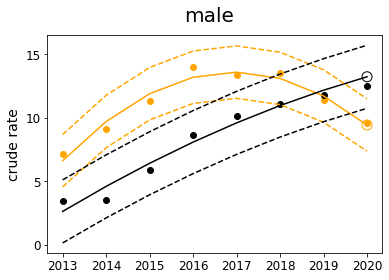

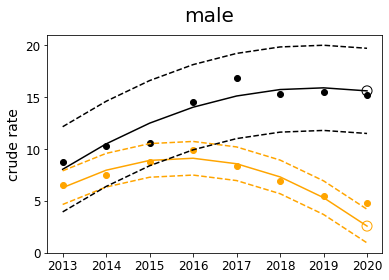

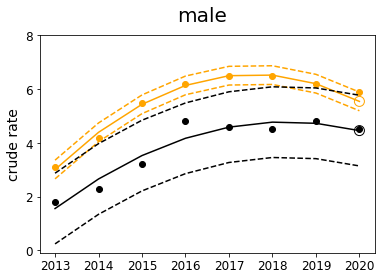

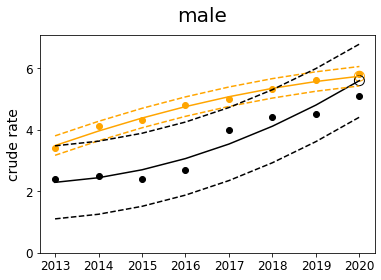

In [12]:
#plt.figure(figsize=(10, 8))

plt.figure()
plt.plot(x2cw1, np.polyval(coeffMw1,x2cw1), color='orange')
plt.scatter(x2w1,y2w1, color='orange')
plt.scatter(2020.0, CM2w1_covid["Crude Rate"], color='orange')
plt.scatter(2020.0, np.polyval(coeffMw1,2020), s=100, edgecolors='orange', facecolors='none')
plt.plot(x2cb1, np.polyval(coeffMb1,x2cb1), color='black')
plt.scatter(x2b1, y2b1, color='black')
plt.scatter(2020.0, CM2b1_covid["Crude Rate"], color='black')
plt.scatter(2020.0, np.polyval(coeffMb1,2020), s=100, edgecolors='black', facecolors='none')

#plt.legend(["White", "Black"], frameon=False, fontsize=14)
plt.plot(x2cw1, np.polyval(coeffMw1,x1cw1)+3*stdMw1, color='orange', linestyle='dashed')
plt.plot(x2cw1, np.polyval(coeffMw1,x1cw1)-3*stdMw1, color='orange', linestyle='dashed')
plt.plot(x2cb1, np.polyval(coeffMb1,x1cb1)+3*stdMb1, color='black', linestyle='dashed')
plt.plot(x2cb1, np.polyval(coeffMb1,x1cb1)-3*stdMb1, color='black',linestyle='dashed')

plt.suptitle('male', fontsize=20)
#plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(np.arange(0, 16.1, 5.0))
#plt.legend(["Black", "White", "Asian"], frameon=False, fontsize=14)
plt.savefig('T40.1_Male_R1.svg')

plt.figure()
plt.plot(x2cw2, np.polyval(coeffMw2,x2cw2), color='orange')
plt.scatter(x2w2,y2w2, color='orange')
plt.scatter(2020.0, CM2w2_covid["Crude Rate"], color='orange')
plt.scatter(2020.0, np.polyval(coeffMw2,2020), s=100, edgecolors='orange', facecolors='none')
plt.plot(x2cb2, np.polyval(coeffMb2, x2cb2), color='black')
plt.scatter(x2b2, y2b2, color='black')
plt.scatter(2020.0, CM2b2_covid["Crude Rate"], color='black')
plt.scatter(2020.0, np.polyval(coeffMb2,2020), s=100, edgecolors='black', facecolors='none')

#plt.legend(["White", "Black"], frameon=False, fontsize=14)
plt.plot(x2cw2, np.polyval(coeffMw2,x1cw2)+3*stdMw2, color='orange', linestyle='dashed')
plt.plot(x2cw2, np.polyval(coeffMw2,x1cw2)-3*stdMw2, color='orange', linestyle='dashed')
plt.plot(x2cb2, np.polyval(coeffMb2,x1cb2)+3*stdMb2, color='black', linestyle='dashed')
plt.plot(x2cb2, np.polyval(coeffMb2,x1cb2)-3*stdMb2, color='black',linestyle='dashed')

plt.suptitle('male', fontsize=20)
#plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(np.arange(0, 20.1, 5))
#plt.legend(["Black", "White", "Asian"], frameon=False, fontsize=14)
plt.savefig('T40.1_Male_R2.svg')

plt.figure()
plt.plot(x2cw3, np.polyval(coeffMw3,x2cw3), color='orange')
plt.scatter(x2w3,y2w3, color='orange')
plt.scatter(2020.0, CM2w3_covid["Crude Rate"], color='orange')
plt.scatter(2020.0, np.polyval(coeffMw3,2020), s=100, edgecolors='orange', facecolors='none')
plt.plot(x2cb3, np.polyval(coeffMb3,x2cb3), color='black')
plt.scatter(x2b3, y2b3, color='black')
plt.scatter(2020.0, CM2b3_covid["Crude Rate"], color='black')
plt.scatter(2020.0, np.polyval(coeffMb3,2020), s=100, edgecolors='black', facecolors='none')

#plt.legend(["White", "Black"], frameon=False, fontsize=14)
plt.plot(x2cw3, np.polyval(coeffMw3,x1cw3)+3*stdMw3, color='orange', linestyle='dashed')
plt.plot(x2cw3, np.polyval(coeffMw3,x1cw3)-3*stdMw3, color='orange', linestyle='dashed')
plt.plot(x2cb3, np.polyval(coeffMb3,x1cb3)+3*stdMb3, color='black', linestyle='dashed')
plt.plot(x2cb3, np.polyval(coeffMb3,x1cb3)-3*stdMb3, color='black',linestyle='dashed')

plt.suptitle('male', fontsize=20)
#plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(np.arange(0, 8.1, 2))
#plt.legend(["Black", "White", "Asian"], frameon=False, fontsize=14)
plt.savefig('T40.1_Male_R3.svg')

plt.figure()
plt.plot(x2cw4, np.polyval(coeffMw4,x2cw4), color='orange')
plt.scatter(x2w4,y2w4, color='orange')
plt.scatter(2020.0, CM2w4_covid["Crude Rate"], color='orange')
plt.scatter(2020.0, np.polyval(coeffMw4,2020), s=100, edgecolors='orange', facecolors='none')
plt.plot(x2cb4, np.polyval(coeffMb4,x2cb4), color='black')
plt.scatter(x2b4, y2b4, color='black')
plt.scatter(2020.0, CM2b4_covid["Crude Rate"], color='black')
plt.scatter(2020.0, np.polyval(coeffMb4,2020), s=100, edgecolors='black', facecolors='none')

#plt.legend(["White", "Black"], frameon=False, fontsize=14)
plt.plot(x2cw4, np.polyval(coeffMw4,x1cw4)+3*stdMw4, color='orange', linestyle='dashed')
plt.plot(x2cw4, np.polyval(coeffMw4,x1cw4)-3*stdMw4, color='orange', linestyle='dashed')
plt.plot(x2cb4, np.polyval(coeffMb4,x1cb4)+3*stdMb4, color='black', linestyle='dashed')
plt.plot(x2cb4, np.polyval(coeffMb4,x1cb4)-3*stdMb4, color='black',linestyle='dashed')

plt.suptitle('male', fontsize=20)
#plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(np.arange(0, 7.1, 2.0))
#plt.legend(["Black", "White", "Asian"], frameon=False, fontsize=14)
plt.savefig('T40.1_Male_R4.svg')

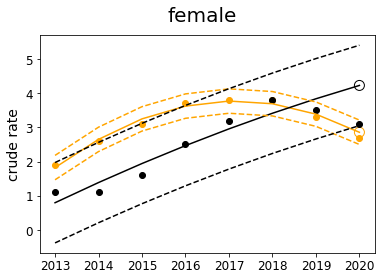

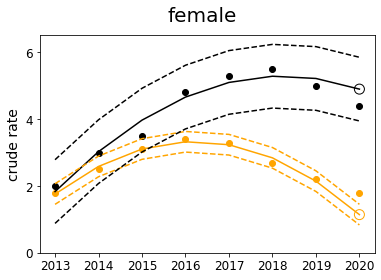

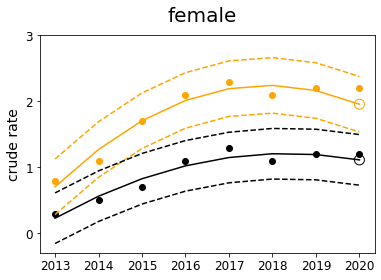

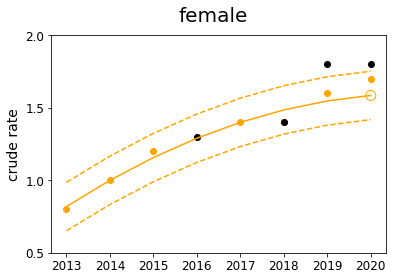

In [13]:
#plt.figure(figsize=(10, 8))

plt.figure()
plt.plot(x1cw1, np.polyval(coeffFw1,x1cw1), color='orange')
plt.scatter(x1w1,y1w1, color='orange')
plt.scatter(2020.0, CF2w1_covid["Crude Rate"], color='orange')
plt.scatter(2020.0, np.polyval(coeffFw1,2020), s=100, edgecolors='orange', facecolors='none')
plt.plot(x1cb1, np.polyval(coeffFb1,x1cb1), color='black')
plt.scatter(x1b1, y1b1, color='black')
plt.scatter(2020.0, CF2b1_covid["Crude Rate"], color='black')
plt.scatter(2020.0, np.polyval(coeffFb1,2020), s=100, edgecolors='black', facecolors='none')

#plt.legend(["White", "Black"], frameon=False, fontsize=14)
plt.plot(x1cw1, np.polyval(coeffFw1,x1cw1)+3*stdFw1, color='orange', linestyle='dashed')
plt.plot(x1cw1, np.polyval(coeffFw1,x1cw1)-3*stdFw1, color='orange', linestyle='dashed')
plt.plot(x1cb1, np.polyval(coeffFb1,x1cb1)+3*stdFb1, color='black', linestyle='dashed')
plt.plot(x1cb1, np.polyval(coeffFb1,x1cb1)-3*stdFb1, color='black',linestyle='dashed')

plt.suptitle('female', fontsize=20)
#plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(np.arange(0, 5.1, 1.0))
#plt.legend(["Black", "White", "Asian"], frameon=False, fontsize=14)
plt.savefig('T40.1_Female_R1.svg')

plt.figure()
plt.plot(x1cw2, np.polyval(coeffFw2,x1cw2), color='orange')
plt.scatter(x1w2,y1w2, color='orange')
plt.scatter(2020.0, CF2w2_covid["Crude Rate"], color='orange')
plt.scatter(2020.0, np.polyval(coeffFw2,2020), s=100, edgecolors='orange', facecolors='none')
plt.plot(x1cb2, np.polyval(coeffFb2,x1cb2), color='black')
plt.scatter(x1b2,y1b2, color='black')
plt.scatter(2020.0, CF2b2_covid["Crude Rate"], color='black')
plt.scatter(2020.0, np.polyval(coeffFb2,2020), s=100, edgecolors='black', facecolors='none')

#plt.legend(["White", "Black"], frameon=False, fontsize=14)
plt.plot(x1cw2, np.polyval(coeffFw2,x1cw2)+3*stdFw2, color='orange', linestyle='dashed')
plt.plot(x1cw2, np.polyval(coeffFw2,x1cw2)-3*stdFw2, color='orange', linestyle='dashed')
plt.plot(x1cb2, np.polyval(coeffFb2,x1cb2)+3*stdFb2, color='black', linestyle='dashed')
plt.plot(x1cb2, np.polyval(coeffFb2,x1cb2)-3*stdFb2, color='black',linestyle='dashed')

plt.suptitle('female', fontsize=20)
#plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(np.arange(0, 6.1, 2.0))
#plt.legend(["Black", "White", "Asian"], frameon=False, fontsize=14)
plt.savefig('T40.1_Female_R2.svg')

plt.figure()
plt.plot(x1cw3, np.polyval(coeffFw3,x1cw3), color='orange')
plt.scatter(x1w3,y1w3, color='orange')
plt.scatter(2020.0, CF2w3_covid["Crude Rate"], color='orange')
plt.scatter(2020.0, np.polyval(coeffFw3,2020), s=100, edgecolors='orange', facecolors='none')
plt.plot(x1cb3, np.polyval(coeffFb3,x1cb3), color='black')
plt.scatter(x1b3, y1b3, color='black')
plt.scatter(2020.0, CF2b3_covid["Crude Rate"], color='black')
plt.scatter(2020.0, np.polyval(coeffFb3,2020), s=100, edgecolors='black', facecolors='none')

#plt.legend(["White", "Black"], frameon=False, fontsize=14)
plt.plot(x1cw3, np.polyval(coeffFw3,x1cw3)+3*stdFw3, color='orange', linestyle='dashed')
plt.plot(x1cw3, np.polyval(coeffFw3,x1cw3)-3*stdFw3, color='orange', linestyle='dashed')
plt.plot(x1cb3, np.polyval(coeffFb3,x1cb3)+3*stdFb3, color='black', linestyle='dashed')
plt.plot(x1cb3, np.polyval(coeffFb3,x1cb3)-3*stdFb3, color='black',linestyle='dashed')

plt.suptitle('female', fontsize=20)
#plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(np.arange(0, 4, 1.0))
#plt.legend(["Black", "White", "Asian"], frameon=False, fontsize=14)
plt.savefig('T40.1_Female_R3.svg')

plt.figure()
plt.plot(x1cw4, np.polyval(coeffFw4,x1cw4), color='orange', label='White')
plt.scatter(x1w4,y1w4, color='orange')
plt.scatter(2020.0, CF2w4_covid["Crude Rate"], color='orange')
plt.scatter(2020.0, np.polyval(coeffFw4,2020), s=100, edgecolors='orange', facecolors='none')

#plt.plot(x1cb4, np.polyval(coeffFb4,x1cb4), color='black')
plt.scatter(x1b4, y1b4, color='black', marker='o', label='Black')
plt.scatter(2020.0, CF2b4_covid["Crude Rate"], color='black')
###plt.legend(["White", "Black"], frameon=False, fontsize=14)
#plt.scatter(2020.0, np.polyval(coeffFb4,2020), s=100, edgecolors='black', facecolors='none')

def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_marker("")

#plt.legend(handler_map={plt.Line2D:HandlerLine2D(update_func=update_prop)}, frameon=False, fontsize=14)

plt.plot(x1cw4, np.polyval(coeffFw4,x1cw4)+3*stdFw4, color='orange', linestyle='dashed')
plt.plot(x1cw4, np.polyval(coeffFw4,x1cw4)-3*stdFw4, color='orange', linestyle='dashed')
#plt.plot(x1cb4, np.polyval(coeffFb4,x1cb4)+3*stdFb4, color='orange', linestyle='dashed')
#plt.plot(x1cb4, np.polyval(coeffFb4,x1cb4)-3*stdFb4, color='orange',linestyle='dashed')

plt.suptitle('female', fontsize=20)
#plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(np.arange(0.5, 2.1, 0.5))
#plt.legend(["Black", "White", "Asian"], frameon=False, fontsize=14)
plt.savefig('T40.1_Female_R4.svg')

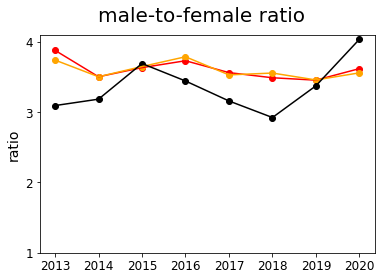

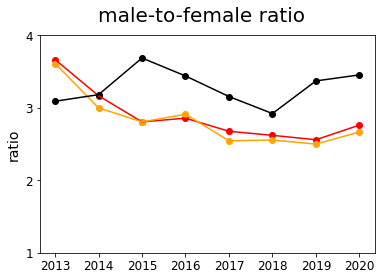

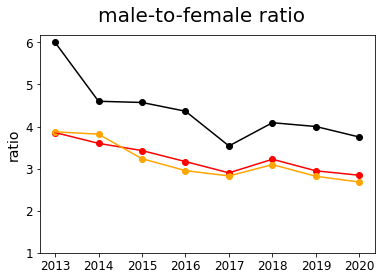

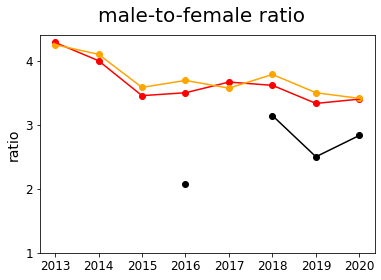

In [14]:
plt.figure()

xr1=CM2nr1["Year"]
yr1=CM2nr1["Crude Rate"].div((CF2nr1["Crude Rate"].values))
plt.plot(xr1, yr1, color="red")
plt.scatter(xr1, yr1, color='red')

#plt.figure()
xrw1=CM2w1["Year"]
yrw1=CM2w1["Crude Rate"].div(CF2w1["Crude Rate"].values)
prew1 = pd.DataFrame({'x axis': xrw1, 'y axis' : yrw1})
postw1= pd.DataFrame({'x axis': 2020.0, 'y axis' : CM2w1_covid["Crude Rate"].div(CF2w1_covid["Crude Rate"].values)})
totalw1 = pd.concat([prew1, postw1])
plt.plot(totalw1['x axis'], totalw1['y axis'], color="orange")
plt.scatter(totalw1['x axis'], totalw1['y axis'], color="orange")

plt.suptitle('male-to-female ratio', fontsize=20)

xrb1=CM2b1["Year"]
yrb1=CM2b1["Crude Rate"].div(CF2b1["Crude Rate"].values)
preb1 = pd.DataFrame({'x axis': xrb1, 'y axis' : yrb1})
postb1= pd.DataFrame({'x axis': 2020.0, 'y axis' : CM2b1_covid["Crude Rate"].div(CF2b1_covid["Crude Rate"].values)})
totalb1 = pd.concat([preb1, postb1])
plt.plot(totalb1['x axis'], totalb1['y axis'], color="black")
plt.scatter(totalb1['x axis'], totalb1['y axis'], color="black")

#plt.legend(["Nationwide", "White", "Black"], frameon=False, fontsize=14)
plt.yticks(np.arange(1, 4.1, 1.0))
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
#plt.xlabel("year", fontsize=14)
plt.ylabel("ratio", fontsize=14)

plt.savefig('T40.1_Ratio_R1.svg')


plt.figure()

xr2=CM2nr2["Year"]
yr2=CM2nr2["Crude Rate"].div((CF2nr2["Crude Rate"].values))
plt.plot(xr2, yr2, color="red")
plt.scatter(xr2, yr2, color='red')

#plt.figure()
xrw2=CM2w2["Year"]
yrw2=CM2w2["Crude Rate"].div(CF2w2["Crude Rate"].values)
prew2 = pd.DataFrame({'x axis': xrw2, 'y axis' : yrw2})
postw2= pd.DataFrame({'x axis': 2020.0, 'y axis' : CM2w2_covid["Crude Rate"].div(CF2w2_covid["Crude Rate"].values)})
totalw2 = pd.concat([prew2, postw2])
plt.plot(totalw2['x axis'], totalw2['y axis'], color="orange")
plt.scatter(totalw2['x axis'], totalw2['y axis'], color="orange")

plt.suptitle('male-to-female ratio', fontsize=20)

xrb2=CM2b2["Year"]
yrb2=CM2b2["Crude Rate"].div(CF2b2["Crude Rate"].values)
preb2 = pd.DataFrame({'x axis': xrb1, 'y axis' : yrb1})
postb2= pd.DataFrame({'x axis': 2020.0, 'y axis' : CM2b2_covid["Crude Rate"].div(CF2b2_covid["Crude Rate"].values)})
totalb2 = pd.concat([preb2, postb2])
plt.plot(totalb2['x axis'], totalb2['y axis'], color="black")
plt.scatter(totalb2['x axis'], totalb2['y axis'], color="black")

#plt.legend(["Nationwide", "White", "Black"], frameon=False, fontsize=14)
plt.yticks(np.arange(1, 4.1, 1.0))
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
#plt.xlabel("year", fontsize=14)
plt.ylabel("ratio", fontsize=14)

plt.savefig('T40.1_Ratio_R2.svg')

plt.figure()

xr3=CM2nr3["Year"]
yr3=CM2nr3["Crude Rate"].div((CF2nr3["Crude Rate"].values))
plt.plot(xr3, yr3, color="red")
plt.scatter(xr3, yr3, color='red')

#plt.figure()
xrw3=CM2w3["Year"]
yrw3=CM2w3["Crude Rate"].div(CF2w3["Crude Rate"].values)
prew3 = pd.DataFrame({'x axis': xrw3, 'y axis' : yrw3})
postw3= pd.DataFrame({'x axis': 2020.0, 'y axis' : CM2w3_covid["Crude Rate"].div(CF2w3_covid["Crude Rate"].values)})
totalw3 = pd.concat([prew3, postw3])
plt.plot(totalw3['x axis'], totalw3['y axis'], color="orange")
plt.scatter(totalw3['x axis'], totalw3['y axis'], color="orange")

plt.suptitle('male-to-female ratio', fontsize=20)

xrb3=CM2b3["Year"]
yrb3=CM2b3["Crude Rate"].div(CF2b3["Crude Rate"].values)
preb3 = pd.DataFrame({'x axis': xrb3, 'y axis' : yrb3})
postb3= pd.DataFrame({'x axis': 2020.0, 'y axis' : CM2b3_covid["Crude Rate"].div(CF2b3_covid["Crude Rate"].values)})
totalb3 = pd.concat([preb3, postb3])
plt.plot(totalb3['x axis'], totalb3['y axis'], color="black")
plt.scatter(totalb3['x axis'], totalb3['y axis'], color="black")


#plt.legend(["Nationwide", "White", "Black"], frameon=False, fontsize=14)
plt.yticks(np.arange(1, 6.1, 1.0))
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
#plt.xlabel("year", fontsize=14)
plt.ylabel("ratio", fontsize=14)

plt.savefig('T40.1_Ratio_R3.svg')

plt.figure()

xr4=CM2nr4["Year"]
yr4=CM2nr4["Crude Rate"].div((CF2nr4["Crude Rate"].values))
plt.plot(xr4, yr4, color="red")
plt.scatter(xr4, yr4, color='red')

#plt.figure()
xrw4=CM2w4["Year"]
yrw4=CM2w4["Crude Rate"].div(CF2w4["Crude Rate"].values)
prew4 = pd.DataFrame({'x axis': xrw4, 'y axis' : yrw4})
postw4= pd.DataFrame({'x axis': 2020.0, 'y axis' : CM2w4_covid["Crude Rate"].div(CF2w4_covid["Crude Rate"].values)})
totalw4 = pd.concat([prew4, postw4])
plt.plot(totalw4['x axis'], totalw4['y axis'], color="orange")
plt.scatter(totalw4['x axis'], totalw4['y axis'], color="orange")

plt.suptitle('male-to-female ratio', fontsize=20)

xrb4=CM2b4["Year"]
yrb4=CM2b4["Crude Rate"].div(CF2b4["Crude Rate"].values)
preb4 = pd.DataFrame({'x axis': xrb4, 'y axis' : yrb4})
postb4= pd.DataFrame({'x axis': 2020.0, 'y axis' : CM2b4_covid["Crude Rate"].div(CF2b4_covid["Crude Rate"].values)})
totalb4 = pd.concat([preb4, postb4])
plt.plot(totalb4['x axis'], totalb4['y axis'], color="black")
plt.scatter(totalb4['x axis'], totalb4['y axis'], color="black")

#plt.legend(["Nationwide", "White", "Black"], frameon=False, fontsize=14)
plt.yticks(np.arange(1, 4.1, 1.0))
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
#plt.xlabel("year", fontsize=14)
plt.ylabel("ratio", fontsize=14)

plt.savefig('T40.1_Ratio_R4.svg')